<a href="https://colab.research.google.com/github/n-nick-2511/DeepLearning2sem/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Импорт библиотек</h1>

In [1]:
!pip install catboost
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from catboost import CatBoostRegressor, Pool
import json
import re
from category_encoders import TargetEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold

<h1>Загрузка и просмотр данных</h1>

In [185]:
train_df = pd.read_csv('train_contest.csv')
test_df = pd.read_csv('for_prediction.csv')


In [157]:
train_df.head()

,premium,name,department,has_test,response_letter_required,area,type,address,response_url,sort_point_distance,...,working_time_intervals,working_time_modes,accept_temporary,description,experience,key_skills,specializations,region,immediate_redirect_url,mean_salary
0,False,Агент по недвижимости,NaN,False,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Санкт-Петербург', 'street': 'Невский...",NaN,NaN,...,[],[],False,"<p>Мы ищем людей, которым не достаточно того, ...","{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'Жилая недвижимость'}, {'name': 'Акт...","[{'id': '20.20', 'name': 'Агент', 'profarea_id...",Санкт-Петербург,NaN,125000.0
1,False,IT-специалист/ техник,NaN,False,False,"{'id': '1130', 'name': 'Братск', 'url': 'https...","{'id': 'open', 'name': 'Открытая'}",NaN,NaN,NaN,...,[],[],False,<ul> </ul> <p><em><strong>Навыки</strong></em>...,"{'id': 'between1And3', 'name': 'От 1 года до 3...",[],"[{'id': '1.172', 'name': 'Начальный уровень, М...",Иркутская область,NaN,50000.0
2,False,Старший/ведущий инженер-программист,NaN,False,False,"{'id': '76', 'name': 'Ростов-на-Дону', 'url': ...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Ростов-на-Дону', 'street': '60К-9, 1...",NaN,NaN,...,[],[],False,<strong>Обязанности:</strong> <ul> <li>Разрабо...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Linux'}, {'name': 'Bash'}, {'name':...","[{'id': '1.221', 'name': 'Программирование, Ра...",Ростовская область,NaN,80000.0
3,False,Эксперт / методист приемной комиссии,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': '1-я Миусская ули...",NaN,NaN,...,[],[],False,<p>Департамент информационных технологий РХТУ ...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': '1С программирование'}, {'name': 'Об...","[{'id': '3.150', 'name': 'Менеджмент продукта ...",Москва,NaN,120000.0
4,False,Табельщица/табельщик,NaN,False,False,"{'id': '1613', 'name': 'Энгельс', 'url': 'http...","{'id': 'open', 'name': 'Открытая'}","{'city': None, 'street': None, 'building': Non...",NaN,NaN,...,[],[],False,<p><strong>Обязанности:</strong></p> <ul> <li>...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Составление отчетности'}, {'name': ...","[{'id': '18.142', 'name': 'Машиностроение', 'p...",Саратовская область,NaN,15000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30072 entries, 0 to 30071
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   premium                   30072 non-null  bool   
 1   name                      30072 non-null  object 
 2   department                752 non-null    object 
 3   has_test                  30072 non-null  bool   
 4   response_letter_required  30072 non-null  bool   
 5   area                      30072 non-null  object 
 6   type                      30072 non-null  object 
 7   address                   19105 non-null  object 
 8   response_url              0 non-null      float64
 9   sort_point_distance       0 non-null      float64
 10  published_at              30072 non-null  object 
 11  created_at                30072 non-null  object 
 12  archived                  30072 non-null  bool   
 13  insider_interview         94 non-null     object 
 14  url   

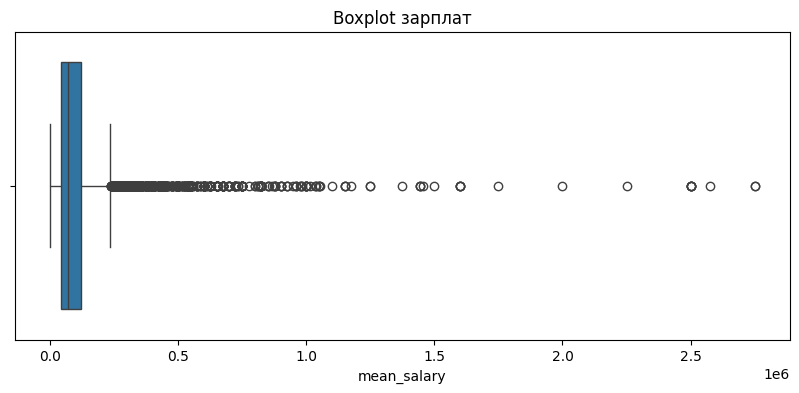

In [158]:
print(train_df.info())
plt.figure(figsize=(10, 4))
sns.boxplot(x=train_df['mean_salary'])
plt.title('Boxplot зарплат')
plt.show()


<h1>Предварительная обработка данных</h1>

Удаление выбросов

In [186]:
def remove_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return df[(df[column] >= lower) & (df[column] <= upper)]

before = len(train_df)
train_df = remove_outliers_iqr(train_df, 'mean_salary')
print(f"После удаления выбросов: {train_df.shape[0]} строк")
print(f"Удалено выбросов: {before - len(train_df)}")



После удаления выбросов: 28179 строк
Удалено выбросов: 1893


Парсим колонку с опытом

In [187]:
def parse_experience(x):
    if pd.isna(x):
        return 0
    x = str(x).lower()
    if 'нет опыта' in x:
        return 0
    if '1' in x and '3' in x:
        return 2
    if '3' in x and '6' in x:
        return 4.5
    if 'более' in x or '6' in x:
        return 7
    return 0

train_df['experience_years'] = train_df['experience'].apply(parse_experience)
test_df['experience_years'] = test_df['experience'].apply(parse_experience)


Из адреса оставляем только регион

In [188]:
def simplify_location(x):
    try:
        if pd.isna(x): return 'Unknown'
        obj = json.loads(x.replace("'", '"'))
        return obj.get('name', 'Unknown')
    except:
        return 'Unknown'

train_df['region'] = train_df['area'].apply(simplify_location)
test_df['region'] = test_df['area'].apply(simplify_location)


Обрабатываем description

In [189]:
keywords = ['python', 'sql', 'javascript', 'machine learning', 'управление', 'data']

def keyword_counter(text, keywords):
    if pd.isna(text): return 0
    text = text.lower()
    return sum(1 for kw in keywords if kw in text)

train_df['keyword_score'] = train_df['description'].apply(lambda x: keyword_counter(x, keywords))
test_df['keyword_score'] = test_df['description'].apply(lambda x: keyword_counter(x, keywords))


 Работаем с key_skills — кол-во уникальных слов + наличие ТОП-скиллов

In [190]:
def skill_count(x):
    try:
        if pd.isna(x): return 0
        skills = json.loads(x.replace("'", '"'))
        return len(set(s['name'].lower() for s in skills))
    except:
        return 0

def has_skill(x, skill):
    try:
        skills = json.loads(x.replace("'", '"'))
        return any(skill.lower() in s['name'].lower() for s in skills)
    except:
        return 0

top_skills = ['Python', 'SQL', 'JavaScript', 'Data']

train_df['skill_count'] = train_df['key_skills'].apply(skill_count)
test_df['skill_count'] = test_df['key_skills'].apply(skill_count)

for skill in top_skills:
    train_df[f'has_{skill.lower()}'] = train_df['key_skills'].apply(lambda x: has_skill(x, skill))
    test_df[f'has_{skill.lower()}'] = test_df['key_skills'].apply(lambda x: has_skill(x, skill))


Обрабатываем даты публикации объявлений: сколько дней назад

In [191]:

from datetime import datetime
# Преобразуем в формат datetime
train_df['published_at'] = pd.to_datetime(train_df['published_at'], errors='coerce').dt.tz_localize(None)
test_df['published_at'] = pd.to_datetime(train_df['published_at'], errors='coerce').dt.tz_localize(None)

# Текущая дата
today = pd.to_datetime(datetime.today().date())

# Новая колонка: сколько дней прошло
train_df['days_since_published'] = (today - train_df['published_at']).dt.days
test_df['days_since_published'] = (today - train_df['published_at']).dt.days


Обрабатываем категориальные признаки

In [192]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder

high_card_cols = ['name', 'region', 'employer']


te = TargetEncoder(cols=high_card_cols)
train_df[high_card_cols] = te.fit_transform(train_df[high_card_cols], train_df['mean_salary'])
test_df[high_card_cols] = te.transform(test_df[high_card_cols])



Заполняем пропуски

In [193]:
categorical_cols = ['premium', 'has_test', 'response_letter_required', 'type', 'archived',
                   'accept_temporary', 'schedule', 'working_days', 'working_time_intervals', 'working_time_modes',
                    'has_python', 'has_sql', 'has_javascript', 'has_data']


for df in [train_df, test_df]:
    for col in df.columns:
        if col != 'mean_salary':
            if col in categorical_cols:
                df[col] = df[col].astype(str).fillna('Unknown')
            elif df[col].dtype in ['int64', 'float64', 'int32', 'float32']:
                df[col] = df[col].fillna(df[col].median() if df[col].notna().any() else 0)
            else:
                df[col] = df[col].astype(str).fillna('Unknown')

Удаляем лишнее

In [194]:
drop_cols = ['area', 'address', 'key_skills', 'description', 'experience', 'department', 'published_at']
train_df.drop(columns=[col for col in drop_cols if col in train_df.columns], inplace=True)
test_df.drop(columns=[col for col in drop_cols if col in test_df.columns], inplace=True)


In [243]:
drop_cols = ['area', 'address', 'key_skills', 'specializations', 'description', 'experience',
             'response_url', 'immediate_redirect_url', 'department', 'insider_interview', 'published_at', 'created_at', 'url', 'alternate_url', 'relations', 'contacts', 'address_street', 'snippet']
for df in [train_df, test_df]:
    df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)
    df = df.drop(columns=[col for col in drop_cols if col in df.columns])

In [244]:
train_df.head()

,premium,name,has_test,response_letter_required,type,sort_point_distance,archived,employer,schedule,working_days,...,region,mean_salary,experience_years,keyword_score,skill_count,has_python,has_sql,has_javascript,has_data,days_since_published
0,False,112979.779411,False,False,"{'id': 'open', 'name': 'Открытая'}",0.0,False,82927.481187,"{'id': 'flexible', 'name': 'Гибкий график'}",[],...,92781.450302,125000.0,0.0,0,6,False,False,False,False,1108
1,False,75316.507016,False,False,"{'id': 'open', 'name': 'Открытая'}",0.0,False,73577.881392,"{'id': 'flyInFlyOut', 'name': 'Вахтовый метод'}",[],...,70256.807468,50000.0,2.0,0,0,False,False,False,False,1115
2,False,79219.761247,False,False,"{'id': 'open', 'name': 'Открытая'}",0.0,False,76795.907748,"{'id': 'fullDay', 'name': 'Полный день'}",[],...,77539.274566,80000.0,2.0,0,3,False,False,False,False,1109
3,False,84424.100222,False,False,"{'id': 'open', 'name': 'Открытая'}",0.0,False,83280.047920,"{'id': 'fullDay', 'name': 'Полный день'}",[],...,106026.861091,120000.0,2.0,0,5,False,True,False,False,1130
4,False,70762.710414,False,False,"{'id': 'open', 'name': 'Открытая'}",0.0,False,69699.776760,"{'id': 'fullDay', 'name': 'Полный день'}",[],...,52535.602531,15000.0,2.0,0,7,False,False,False,False,1111


Разделяем на обучающую и тестовую выборку

In [229]:
X = train_df.drop(['mean_salary'], axis=1)
y = train_df['mean_salary']
print("Размер X:", X.shape)
print("Размер y:", y.shape)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Размер X: (28179, 22)
Размер y: (28179,)


In [237]:
test_ids = test_df['Id']
X_test = test_df.drop(columns=['Id'], errors='ignore')
X_test = X_test[X.columns]
print(f"X_test: {X_test.shape}")

X_test: (7518, 22)


<h1>Обучение модели CatBoostRegressor</h1>


In [230]:
from catboost import CatBoostRegressor

categorical_cols = [col for col in categorical_cols if col in train_df.columns]

model = CatBoostRegressor(verbose=100, random_state=42, cat_features=categorical_cols)
model.fit(X_train, y_train)

Learning rate set to 0.066982
0:	learn: 47440.4501231	total: 28.2ms	remaining: 28.2s
100:	learn: 17514.5749483	total: 4.04s	remaining: 36s
200:	learn: 16723.0171635	total: 6.27s	remaining: 24.9s
300:	learn: 16224.7504857	total: 8.47s	remaining: 19.7s
400:	learn: 15833.3759643	total: 10.7s	remaining: 16s
500:	learn: 15434.1673292	total: 13.4s	remaining: 13.3s
600:	learn: 15100.7639632	total: 17s	remaining: 11.3s
700:	learn: 14796.6090178	total: 19.4s	remaining: 8.27s
800:	learn: 14520.2931681	total: 21.8s	remaining: 5.42s
900:	learn: 14274.2048480	total: 24.3s	remaining: 2.67s
999:	learn: 14064.1177918	total: 28.1s	remaining: 0us


Посмотрим оценки на валидационной выборке

In [231]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")


MSE: 259028997.70
MAE: 9738.96


Визуализируем

<ipython-input-249-9fc556ddca37>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


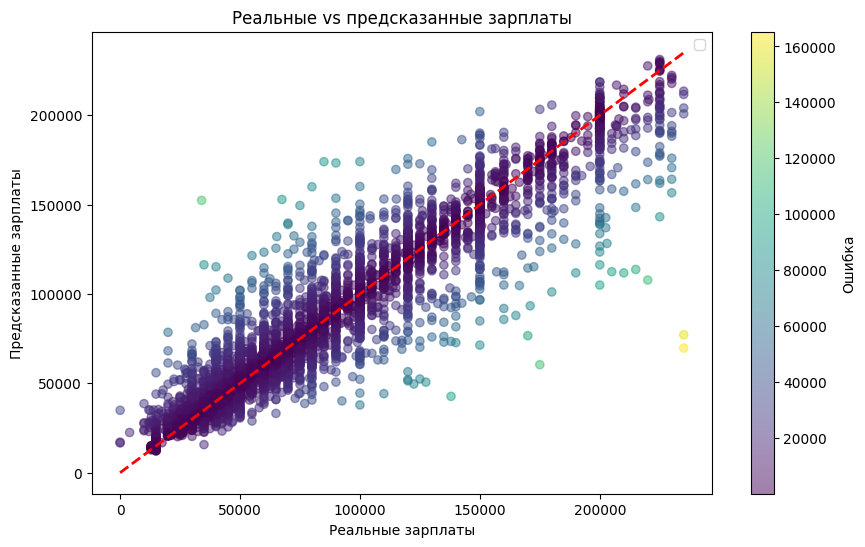

In [249]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(y_val, y_pred, c=np.abs(y_val - y_pred), alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.colorbar(scatter, label='Ошибка')
plt.xlabel('Реальные зарплаты')
plt.ylabel('Предсказанные зарплаты')
plt.title('Реальные vs предсказанные зарплаты')
plt.legend()
plt.show()

Смотрим на важность признаков

In [250]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.get_feature_importance()
}).sort_values(by='importance', ascending=False)
print(feature_importance.head(10))

                 feature  importance
1                   name   42.817316
7               employer   40.132363
13                region    5.453914
14      experience_years    5.120364
21  days_since_published    1.490128
16           skill_count    1.319536
15         keyword_score    0.979616
8               schedule    0.848406
18               has_sql    0.653524
12      accept_temporary    0.302186


Предсказание для тестовой выборки

In [251]:
test_pool = Pool(X_test, cat_features=categorical_cols)
y_test_pred = model.predict(test_pool)

Сохраняем предсказание в файл для сабмишна

In [252]:
submission = pd.DataFrame({'Id': test_ids, 'Predicted': y_test_pred})
submission.to_csv('submission.csv', index=False)


Результат на кагле: 41370